# Rotifer and Protozoa Image Classification Research Project 
### Ryan Johnson 

## Rotifer and Protozoa Image Classification (Single Label)

Microorganisms

Six labels in total
* Paramecium
* Protozoa
* Rotifer
* Spirostomum
* Stentor
* Vorticella

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow
import tensorflow as tf

# to build dataset in tensorflow need use datasets
from tensorflow.keras import datasets, layers, models

import torch
import torchvision
#import torchvision.transforms as transforms

import sys
import os
from os import listdir

import PIL # Python Imaging Library
from IPython.display import display # Display Images
import pathlib

import random # to set the seed

# confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

Image Classification Help: https://www.tensorflow.org/tutorials/images/classification

**----------------------------------------------------------------------------------------------------------------------------------------------**

# The Datasets are Split into Train/Validation and Test for the Rotifer and Protozoa Labels of Image Classification
The protozoa data is **NOT** split into train and valid; they are combined.

The test data is the same, with NO change.

**----------------------------------------------------------------------------------------------------------------------------------------------**

The image dataset has 1,968 image files with six classes in total: Paramecium, Protozoa (small undetermined protozoa), Rotifer, Spirostomum, Stentor, and Vorticella.

With **Augmented Images** in the image dataset, there are 4,724 image files with six classes: Paramecium, Protozoa (small undetermined protozoa), Rotifer, Spirostomum, Stentor, and Vorticella.

The images are stored in the following directory structure.

* protozoa_class_labels
    * Paramecium
    * Protozoa
    * Rotifer
    * Spirostomum
    * Stentor
    * Vorticella

----------------and------------------------------
* test
    * Paramecium
    * Protozoa
    * Rotifer
    * Spirostomum
    * Stentor
    * Vorticella

## Rotifer and Protozoa Image Classification Directory Paths
(Each version has a different file path)

**----------------------------------------------------------------------------------------------------------------------------------------------**

### Version 1 (v1) of the dataset of the rotifer and protozoa classes
(protozoa_class_labels_train_valid)

Note: It has Augmented Images to help improve model performance

### I used Roboflow techniques to enhance the images compiled from the videos. 
#### Below are the details of what each version has to improve the model.

The dataset includes 4724 images.
Protozoa-9S7c are annotated in folder format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)
* Auto-contrast via contrast stretching

The following augmentation was applied to create 3 versions of each source image:
* Randomly crop between 0 and 20 percent of the image
* Random exposure adjustment of between -10 and +10 percent

In [2]:
v1_p_img_dir = "protozoa_class_single_label_v1_unsplit_train_valid/protozoa_class_labels_train_valid"
# Note: It has Augmented Images to help improve model performance

**----------------------------------------------------------------------------------------------------------------------------------------------**

### Version 2 (v2) of the dataset of the rotifer and protozoa classes
(protozoa_class_labels_train_valid)

Note: It has Augmented Images to help improve model performance

### I used Roboflow techniques to enhance the images compiled from the videos. 
#### Below are the details of what each version has to improve the model.

The dataset includes 4724 images.
Protozoa-9S7c are annotated in folder format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)
* Auto-contrast via contrast stretching

The following augmentation was applied to create 3 versions of each source image:
* Randomly crop between 0 and 10 percent of the image
* Random exposure adjustment of between -5 and +5 percent

In [3]:
# Protozoa image classification directory

# Version2
# The folder that contains Paramecium, 
# small protozoa, Rotifer, Spirostomum, Stentor, Vorticella images

v2_p_img_dir = "protozoa_class_single_label_v2_unsplit_train_valid/protozoa_class_labels_train_valid"
# Note: It has Augmented Images to help improve model performance

**----------------------------------------------------------------------------------------------------------------------------------------------**

### Version 8 (v8) of the dataset of the rotifer and protozoa classes
(protozoa_class_labels_train_valid)

Note: It has Augmented Images to help improve model performance

### I used Roboflow techniques to enhance the images compiled from the videos. 
#### Below are the details of what each version has to improve the model.

The dataset includes 4723 images.
Protozoa-9S7c are annotated in folder format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)
* Auto-contrast via contrast stretching

The following augmentation was applied to create 3 versions of each source image:
* Random brightness adjustment of between -10 and +10 percent
* Random exposure adjustment of between -5 and +5 percent
* Random Gaussian blur of between 0 and 0.8 pixels

In [4]:
v8_p_img_dir = "protozoa_class_single_label_v8_unsplit_train_valid/protozoa_class_labels_train_valid"
# Note: It has Augmented Images to help improve model performance

**----------------------------------------------------------------------------------------------------------------------------------------------**

### Version 9 (v9) of the dataset of the rotifer and protozoa classes
(protozoa_class_labels_train_valid)

Note: No Augmented Images are used 

I want to see the difference between using augmented images and not using them.

### I used Roboflow techniques to enhance the images compiled from the videos. 
#### Below are the details of what each version has to improve the model.

The dataset includes 1968 images.
Protozoa-9S7c are annotated in folder format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)
* Auto-contrast via contrast stretching

No image augmentation techniques were applied.

In [5]:
v9_p_img_dir = "protozoa_class_single_label_v9_unsplit_train_valid/protozoa_class_labels_train_valid"
# No Augmented Images Used

**----------------------------------------------------------------------------------------------------------------------------------------------**

## The user gets to choose which version to use in the model.
* Version 1- Note: It has Augmented Images to help improve model performance
* Version 2- Note: It has Augmented Images to help improve model performance
* Version 8- Note: It has Augmented Images to help improve model performance
* Version 9- Note: No Augmented Images are used

In [6]:
user_input = int(input("Please Enter Version Number (1, 2, 8, 9): "))

if user_input == 1:
    version_p_img_dir= v1_p_img_dir
    print("You have chosen version 1")
    print(f"Path Version 1: {version_p_img_dir}")
    
elif user_input == 2:
    version_p_img_dir= v2_p_img_dir
    print("You have chosen version 2")
    print(f"Path Version 2: {version_p_img_dir}")
    
elif user_input == 8:
    version_p_img_dir= v8_p_img_dir
    print("You have chosen version 8")
    print(f"Path Version 8: {version_p_img_dir}")
    
elif user_input == 9:
    version_p_img_dir= v9_p_img_dir
    print("You have chosen version 9")
    print(f"Path Version 9: {version_p_img_dir}")
    
else:
    print("Input Invalid -- Try Again")

Please Enter Version Number (1, 2, 8, 9):  8


You have chosen version 8
Path Version 8: protozoa_class_single_label_v8_unsplit_train_valid/protozoa_class_labels_train_valid


### Double-checking the listed directories
The directories are only the images that are located in each file label.

In [7]:
total_files = 0
# root, directory, files in the path of the folder
for root, direc, files in os.walk(str(version_p_img_dir)):
    
    # spliting up the levels of folder files within the main folder
    folder_levels = root.replace(str(version_p_img_dir), '').count(os.sep)
    
    # adding spacing to directories
    spacing = ' ' * (folder_levels) * 5
    
    print(f'{spacing}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
    
print()   
print(f'There are {total_files -1} images in this dataset')

protozoa_class_labels_train_valid/ (0 files)
     paramecium/ (108 files)
     protozoa/ (63 files)
     rotifer/ (1963 files)
     Spirostomum/ (679 files)
     stentor/ (395 files)
     vorticella/ (1319 files)

There are 4526 images in this dataset


### Loading and Preprocessing Rotifer and Protozoa Images

Parameters for each of the functions for train_data and valid_data

In [8]:
batch_size = 32
image_height = 500 # the image is (500, 500)
image_width = 500
train_test_split = 0.2 # 80/20
channels = 3 # Channel is (3) for RGB colors

### Creating training and test(validation) datasets for rotifer and protozoa images
The training dataset is specified by using subset=" training."
The valid dataset is specified by using subset=" validation."

#### Setting the seed to reproduce results

In [9]:
set_seed = 12

os.environ['PYTHONHASHSEED']=str(set_seed)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(set_seed)
np.random.seed(set_seed)
tf.random.set_seed(set_seed)

In [10]:
# help(tf.keras.preprocessing.image_dataset_from_directory)

In [11]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  version_p_img_dir, # parent folder contains all the folders contaning protozoa
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  validation_split= train_test_split,
  subset="training",
  seed= set_seed, # seed is 12
  image_size=(image_height, image_width),
  batch_size=batch_size
)

Found 4527 files belonging to 6 classes.
Using 3622 files for training.


In [12]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
  version_p_img_dir, # parent folder contains all the folders contaning protozoa
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  validation_split= train_test_split,
  subset="validation",
  seed= set_seed, # seed is 12
  image_size=(image_height, image_width),
  batch_size=batch_size
)

Found 4527 files belonging to 6 classes.
Using 905 files for validation.


### Rotifer and Protozoa Labels

In [13]:
# v2_label_dir = [ n for n in list(os.listdir(v2_p_img_dir)) 
#                   if os.path.isdir(os.path.join(v2_p_img_dir, n)) ]

# using new and better way to get the protozoa labels
protozoa_labels = train_data.class_names # class_names - gives the labels for the protoza

# Capitalizing protozoa labels
temp_list=[]
for label in protozoa_labels:
    temp_list.append(label.capitalize())

version_label_dir = temp_list

print(f'Capitalized Protozoa labels: \n{version_label_dir}')

Capitalized Protozoa labels: 
['Spirostomum', 'Paramecium', 'Protozoa', 'Rotifer', 'Stentor', 'Vorticella']


In [14]:
for imag, lab in train_data.take(1):
    print(f'Image Batch Shape: {imag.shape}\nLabel Batch Shape: {lab.shape}')
    
# Image Batch Shape:
# 1. number of images per batch (32)
# 2. Height of the image (500)
# 3. Width of the image (500)
# 4. Channel is (3) for RGB colors

Image Batch Shape: (32, 500, 500, 3)
Label Batch Shape: (32,)


In [15]:
print(version_label_dir)

['Spirostomum', 'Paramecium', 'Protozoa', 'Rotifer', 'Stentor', 'Vorticella']


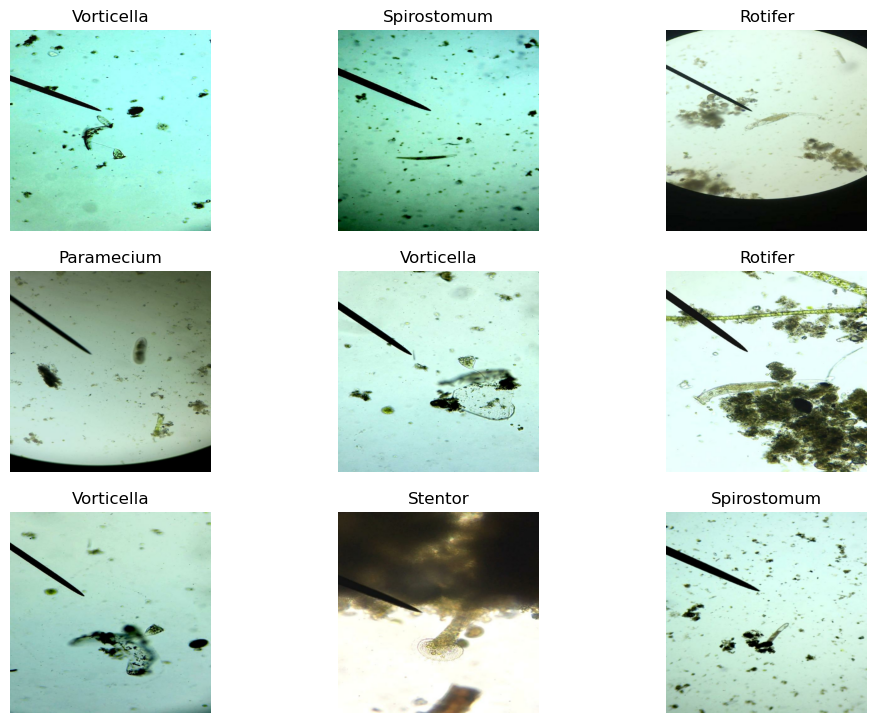

In [16]:
plt.figure(figsize=(12, 12))
for imag, lab in train_data.take(1): # take(1) for the 1 batch (32 images)
    for i in range(9):
        ax = plt.subplot(4, 3, i + 1) # better spacing
        plt.axis("off") # not axis
        plt.imshow(imag[i].numpy().astype("uint16"))
        plt.title(version_label_dir[lab[i]])

### Better Performance for the dataset (Rotifer and Protozoa Images)
The datasets are large, and we don't need to load all the images from memory. TensorFlow engine can iterate over the images and process them in a streaming fashion.
Dataset.cache keeps the images in memory after loading them off the disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model.
Dataset.prefetch overlaps with data preprocessing and model execution while training.

In [17]:
autotune = tf.data.AUTOTUNE # Tune the value at the runtime.

# differences in the train and valid/test datasets:

# * train dataset we use caching, shuffling and prefetching.
#   This is similar to normalization using fit_transform.
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=autotune)

# * valid/test dataset we us use cach and prefectch only.
#   We don't need to shuffle fit test dataset for normlization.
valid_data = valid_data.cache().prefetch(buffer_size=autotune)

### Normalize Data

In [18]:
# normalize the data
# convert to number of 1 and 0 using layers.experimental.preprocessing.
# Rescaling range of the pixel values in the images is between 0 and 255.

normalize_layer = tf.keras.layers.Rescaling(1.0/255.0)

# Note: 
# tf.keras.layers.experimental.preprocessing.Rescaling
# IS NOW
# tf.keras.layers.Rescaling

### Creating CNN Model for Rotifer and Protozoa Images

In [19]:
# Image Batch Shape:
# 1. number of images per batch (32)
# 2. Height of the image (500)
# 3. Width of the image (500)
# 4. Channel is (3) for RGB colors


num_lab = len(version_label_dir) # number of classes (labels)
print(f'There are {num_lab} classes in the protozoa image dataset')

# channels= 3
print(f'There are {channels} channels in the protozoa images')


protozoa_cnn_model = tf.keras.Sequential([
    # normalize images to [0, 1] using 1.0/255.0
    layers.Rescaling(1.0/255.0, input_shape=(image_height, image_width, channels)),
    
    # creates a kernel for the input layer
    # padding ='same' evenly speads the data to the left and right or up and down of the input
    # activation='relu' is ReLU which stands for Rectified Linear Unit 
      #  which is a non-linear activation function which is very helpful for CNN models
      #  ReLU is best for CNN for neural networks
    layers.Conv2D(16, 3, padding='same', activation='relu'), # focusing on 3x3 region

    # Max pooling for 2D spatial data
    layers.MaxPooling2D(),
    

    layers.Conv2D(32, 3, padding='same', activation='relu'), # focusing on 3x3 region

    layers.MaxPooling2D(),
    

    layers.Conv2D(64, 3, padding='same', activation='relu'), # focusing on 3x3 region
    
    layers.MaxPooling2D(), 
    
    
    # adding 256, 3 for 500
    layers.Conv2D(256, 3, padding='same', activation='relu'), # focusing on 3x3 region

    layers.MaxPooling2D(), # adding because of 500 
    
    
    layers.Flatten(), # changing 4D array to 2D array

    layers.Dense(500, activation='relu'), # 500 neurons
    
    layers.Dense(num_lab, activation=None) # unit number of labels in the class

])

There are 6 classes in the protozoa image dataset
There are 3 channels in the protozoa images


#### Rotifer and Protozoa CNN Model Summary

In [20]:
protozoa_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 250, 250, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 125, 125, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

### Configure the model
The labels have 6 classes. They are encoded as an integer.

In [21]:
protozoa_cnn_model.compile(optimizer='adam', # optimizer
                # loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) # metrics for the accuracy in the output
# viewing train and validation accuracy when training epcoh

### Training the Rotifer and Protozoa CNN Model
I am using early stopping in training the model to ensure that my memory does not clash. The training will be stopped in 4 epochs if there is no improvement.

I am using 25 epochs in the training.

In [22]:
%%time

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 4)
                                           # stoped in 4 epochs if no improvement
history = protozoa_cnn_model.fit(train_data,
                                 epochs=25,
                                 validation_data=(valid_data),
                                 callbacks=[callback], verbose = 1)

Epoch 1/25
114/114 [==============================] - 534s 5s/step - loss: 0.5172 - accuracy: 0.9285 - val_loss: 0.0210 - val_accuracy: 0.9945
Epoch 2/25
114/114 [==============================] - 318s 3s/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0206 - val_accuracy: 0.9945
Epoch 3/25
114/114 [==============================] - 316s 3s/step - loss: 0.0481 - accuracy: 0.9912 - val_loss: 0.0310 - val_accuracy: 0.9890
Epoch 4/25
114/114 [==============================] - 318s 3s/step - loss: 0.0412 - accuracy: 0.9898 - val_loss: 0.0319 - val_accuracy: 0.9912
Epoch 5/25
114/114 [==============================] - 314s 3s/step - loss: 0.0236 - accuracy: 0.9956 - val_loss: 0.0107 - val_accuracy: 0.9978
Epoch 6/25
114/114 [==============================] - 319s 3s/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0144 - val_accuracy: 0.9978
Epoch 7/25
114/114 [==============================] - 320s 3s/step - loss: 1.9482e-04 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.

### Evaluate Rotifer and Protozoa CNN Model

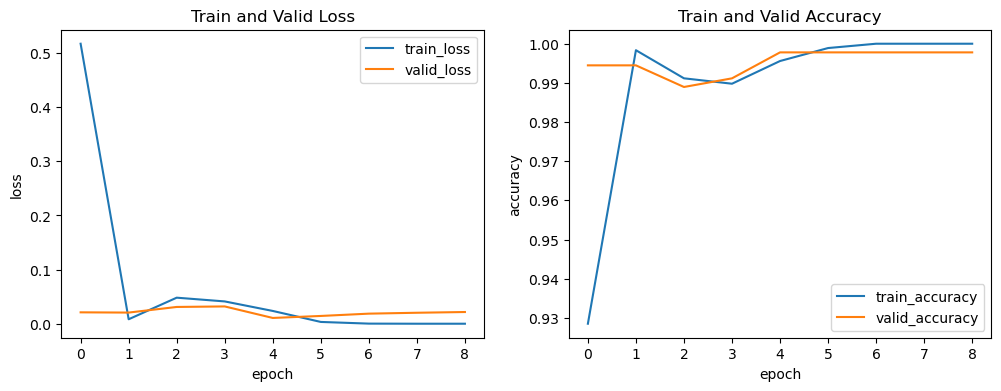

In [23]:
#Converting the train and validation loss for plotting
trainhist = pd.DataFrame(history.history)

#epoch index
trainhist['epoch'] = history.epoch

# figure size
plt.figure(figsize=(12,4))

# subplot to put the graphs next to each other
plt.subplot(1, 2, 1)

#Plot train loss
plt.plot(trainhist['epoch'], trainhist['loss'])

#Plot validation loss
plt.plot(trainhist['epoch'], trainhist['val_loss'])


#Add legends
plt.legend(labels=['train_loss', 'valid_loss'])
plt.title("Train and Valid Loss")
plt.xlabel("epoch")
plt.ylabel("loss")

#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------

# Training and Valid accuracy

# subplot to put the graphs next to each other
plt.subplot(1, 2, 2)

#Plot train loss
plt.plot(trainhist['epoch'], trainhist['accuracy'])

#Plot validation loss
plt.plot(trainhist['epoch'], trainhist['val_accuracy'])

#Add legends
plt.legend(labels=['train_accuracy', 'valid_accuracy'])
plt.title("Train and Valid Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.show()


Both graphs show that the training and validation loss is low, between 0.0 and 0.1, and improves with more epochs.

Then, the overall training and validation accuracy is high, between 0.985 and 1.00, nearly 100%. It improves with more epochs, and the model is highly accurate.

### Evaluate Validation Data
Printing Loss and Accuracy of valid_data

In [24]:
loss, acc = protozoa_cnn_model.evaluate(valid_data)
print(f'Loss: {round(loss, 6)}\nAccuracy: {round(acc, 6)}')

29/29 [==============================] - 14s 475ms/step - loss: 0.0216 - accuracy: 0.9978
Loss: 0.021621
Accuracy: 0.99779


**----------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------**

# Testing the Rotifer and Protozoa CNN Model on the Test dataset
The prediction is based on the Test dataset. (Microorganisms)

#### **No Augmented Images are used.**

The **Test** images are stored in the following directory structure.

* test
    * Paramecium
    * Protozoa
    * Rotifer
    * Spirostomum
    * Stentor
    * Vorticella

### Test Data Rotifer and Protozoa Image Classification Directory Paths
(Each version has a different file path)

#### Test images dataset of the rotifer and protozoa classes Version 1 (v1)


In [25]:
v1_test_images = "protozoa_class_single_label_v1_unsplit_train_valid/test"

#### Test images dataset of the rotifer and protozoa classes Version 2 (v2)


In [26]:
v2_test_images = "protozoa_class_single_label_v2_unsplit_train_valid/test"

#### Test images dataset of the rotifer and protozoa classes Version 8 (v8)


In [27]:
v8_test_images = "protozoa_class_single_label_v8_unsplit_train_valid/test"

#### Test images dataset of the rotifer and protozoa classes Version 9 (v9) 


In [28]:
v9_test_images = "protozoa_class_single_label_v9_unsplit_train_valid/test"

### The if-else statements are used to go through what test dataset version we will be using.

In [29]:
# the version number was already entered above
user_input_for_test_data = user_input 

# The if else statement is used to go through what test set we will be using

if user_input_for_test_data == 1:
    chosen_test_images= v1_test_images
    print("The chosen Test set version is 1")
    print(f"Test Path Version 1: {chosen_test_images}")
    
elif user_input_for_test_data == 2:
    chosen_test_images= v2_test_images
    print("The chosen Test set version is 2")
    print(f"Test Path Version 2: {chosen_test_images}")
    
elif user_input_for_test_data == 8:
    chosen_test_images= v8_test_images
    print("The chosen Test set version is 8")
    print(f"Test Path Version 8: {chosen_test_images}")
    
elif user_input_for_test_data == 9:
    chosen_test_images= v9_test_images
    print("The chosen Test set version is 9")
    print(f"Test Path Version 9: {chosen_test_images}")
    
else:
    print("Input Invalid -- Try Again")

The chosen Test set version is 8
Test Path Version 8: protozoa_class_single_label_v8_unsplit_train_valid/test


#### Double-checking the listed directories for Test Dataset

In [30]:
total_files = 0
# root, directory, files in the path of the folder
for root, direc, files in os.walk(str(chosen_test_images)):
    
    # spliting up the levels of folder files within the main folder
    folder_levels = root.replace(str(chosen_test_images), '').count(os.sep)
    
    # adding spacing to directories
    spacing = ' ' * (folder_levels) * 5
    
    print(f'{spacing}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
    
print()   
print(f'There are {total_files -1} images in this dataset')

test/ (0 files)
     paramecium/ (4 files)
     protozoa/ (2 files)
     rotifer/ (81 files)
          .ipynb_checkpoints/ (5 files)
     Spirostomum/ (31 files)
     stentor/ (21 files)
     vorticella/ (57 files)

There are 200 images in this dataset


In [31]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
  chosen_test_images, # test folder contains all the folders contaning protozoa
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', 
    # 'categorical' causes errors needs to be 'int'
    
    #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    # 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    
  seed= set_seed, # seed is 12
  image_size=(image_height, image_width), # 500, 500
  batch_size=batch_size
)

Found 201 files belonging to 6 classes.


#### Test dataset of Rotifer and Protozoa Labels

In [32]:
# using new and better way to get the protozoa labels
test_protozoa_labels = test_data.class_names # class_names - gives the labels for the protoza

# Capitalizing protozoa labels
temp_list=[]
for label in test_protozoa_labels:
    temp_list.append(label.capitalize())

cap_test_protozoa_labels = temp_list

print(f'Capitalized Protozoa labels: \n{cap_test_protozoa_labels}')

Capitalized Protozoa labels: 
['Spirostomum', 'Paramecium', 'Protozoa', 'Rotifer', 'Stentor', 'Vorticella']


# protozoa_cnn_model Predictions based on Test Dataset

#### Predictions based on test data (all test images of rotifer and protozoa collected)

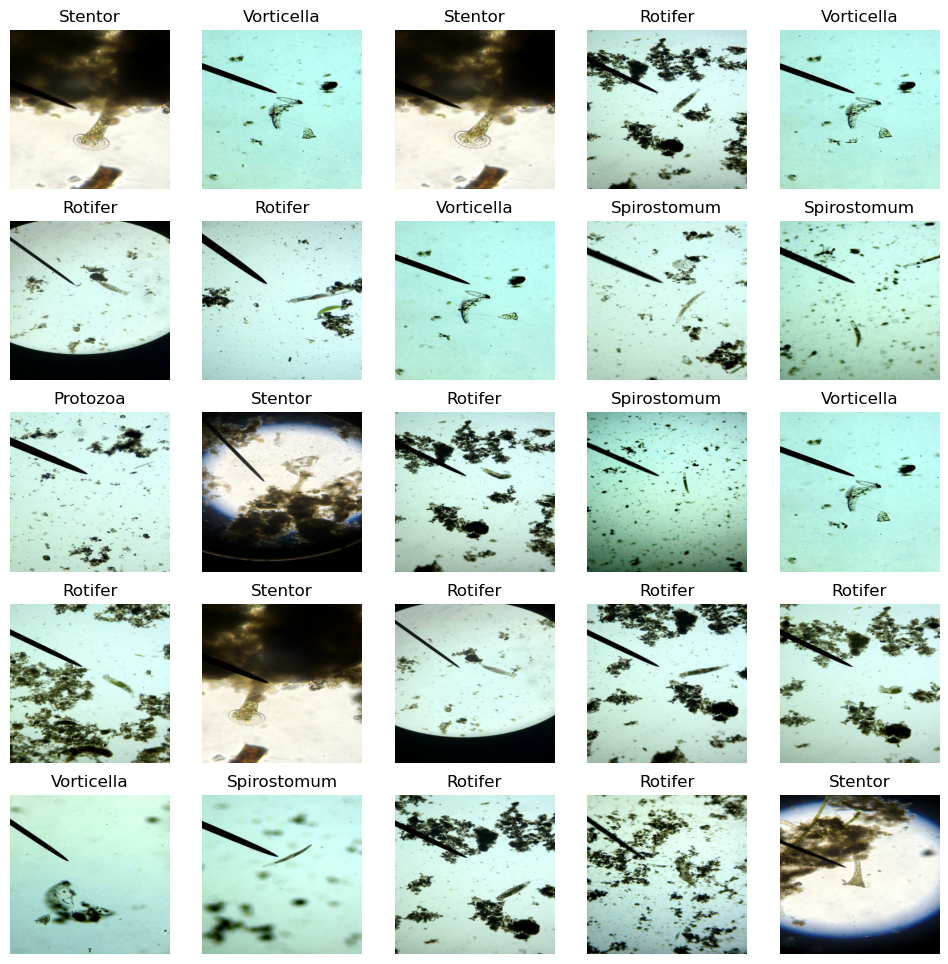

In [33]:
plt.figure(figsize=(12, 12))
for imag, lab in test_data.take(1): # take(1) for the 1 batch (32 images)
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.axis("off") # not axis
        plt.imshow(imag[i].numpy().astype("uint16"))
        plt.title(cap_test_protozoa_labels[lab[i]])

### Predicting which rotifer and protozoa classification the images are:
List of microorganisms: ['Spirostomum,' 'Paramecium,' 'Protozoa,' 'Rotifer,' 'Stentor,' 'Vorticella']

### The Chosen Version # for the Test Dataset (Test Images)

In [34]:
print(chosen_test_images)

protozoa_class_single_label_v8_unsplit_train_valid/test


## Getting One JPG Image from each microorganism label (class) folder

The code below runs through each microorganism class folder and selects one random JPG image to test the accuracy based on the distinct image. 

In the code cells below, the microorganism image will be displayed alongside text showing the percent of the likelihood that the image shown confidently matches the classification image.

**Note:** If there are any **.ipynb_checkpoints folders**, one random image will also be selected.

* test/ (0 files)

     * paramecium/ (4 files)
          - **1 jpg image (1 file)**
     * protozoa/ (2 files)
          - **1 jpg image (1 file)**
     * rotifer/ (81 files)
          - **1 jpg image (1 file)**
     * Spirostomum/ (31 files)
          - **1 jpg image (1 file)**
     * stentor/ (21 files)
          - **1 jpg image (1 file)**
     * vorticella/ (57 files)
          - **1 jpg image (1 file)**



##### Helpful links:
- https://www.geeksforgeeks.org/os-path-module-python/
- https://www.javatpoint.com/os-walk-in-python
- https://www.geeksforgeeks.org/show-random-picture-from-a-folder-in-python/
- https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/
- https://www.geeksforgeeks.org/python-os-path-join-method/

In [35]:
# setting seed for random
random.seed(12)

# The chosen version test data (test images)
# print(chosen_test_images) # 'protozoa_class_single_label_v#_unsplit_train_valid/test'

multi_image_paths = []
# root, directories, files in the path of each folder
for root, directories, files in os.walk(chosen_test_images):
    
    # print(root) # folder paths
    
    # print(directories) # directory of each of the folders 
    #    ['paramecium', 'protozoa', 'rotifer', 'Spirostomum', 'stentor', 'vorticella']
    
    # print(files) # all image files in the test folder
    
    for direct in directories:
        # join the folder paths and directory of the folders (folder names)
        #     to get each of label folder paths
        folder_paths = os.path.join(root, direct) 
        # print(folder_paths)
        
        
        #  checking that paths exist for each folder of the directory
        if os.path.isdir(folder_paths):
            
            image_files = []
            # each list has all the image paths within the particular folder
            for img in os.listdir(folder_paths):
                # find jpg images and append them to the list created (image_files)
                if img.lower().endswith('.jpg'):
                    image_files.append(img)
                    
            #print(image_files)                       
                        
            if image_files:
                # selecting a random image from each of the label lists (image_files)
                #   only image name
                random_image = random.choice(image_files)
                
                # print(random_image) # ex: paramecium_MOV-0042_jpg.rf.59f0de89893daf7ed1eace36caac0bd5.jpg
                
                # creating the complete image path by joining each folder path to the image
                #  with the complete image path the computer knowns where to find the image
                #   ex: protozoa_class_single_label_v8_unsplit_train_valid/test\paramecium\paramecium_MOV-0042_jpg.rf.59f0de89893daf7ed1eace36caac0bd5.jpg
                full_image_path = os.path.join(folder_paths, random_image)
                
                # appending full_image_path to the list created multi_image_paths
                multi_image_paths.append(full_image_path)
                
print(f'There is a total of {len(multi_image_paths)} images collected from each of the label folders.')
print()

for image in multi_image_paths:
    print(f'{image}\n')      

There is a total of 7 images collected from each of the label folders.

protozoa_class_single_label_v8_unsplit_train_valid/test\paramecium\paramecium_MOV-0042_jpg.rf.59f0de89893daf7ed1eace36caac0bd5.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\protozoa\small_protozoa_MOV-0003_jpg.rf.71ca369675cc96ba4b50e96e33be4c1f.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\rotifer\rotifer_eating_MOV-0022_jpg.rf.c3123f0cfb622bcceb606742dff5fe78.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\Spirostomum\Spirostomum_3_MOV-0169_jpg.rf.42fd70c28d7be5615b5b04a7c8ce4ffa.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\stentor\stentor_4_MOV-0041_jpg.rf.7d268fd8ca007470afda2b5b6cb66377.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\vorticella\IMG_9625_MOV-0079_jpg.rf.4a00d7a71c295abda3387493244a9214.jpg

protozoa_class_single_label_v8_unsplit_train_valid/test\rotifer\.ipynb_checkpoints\IMG_9606_MOV-0032_jpg.rf.449138b06e068a16e1737337905

### The multiple image paths are stored in multi_image_paths

In [36]:
print(f'multi_image_paths is a: {type(multi_image_paths)}')
print()
print(multi_image_paths)

multi_image_paths is a: <class 'list'>

['protozoa_class_single_label_v8_unsplit_train_valid/test\\paramecium\\paramecium_MOV-0042_jpg.rf.59f0de89893daf7ed1eace36caac0bd5.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\protozoa\\small_protozoa_MOV-0003_jpg.rf.71ca369675cc96ba4b50e96e33be4c1f.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\rotifer\\rotifer_eating_MOV-0022_jpg.rf.c3123f0cfb622bcceb606742dff5fe78.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\Spirostomum\\Spirostomum_3_MOV-0169_jpg.rf.42fd70c28d7be5615b5b04a7c8ce4ffa.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\stentor\\stentor_4_MOV-0041_jpg.rf.7d268fd8ca007470afda2b5b6cb66377.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\vorticella\\IMG_9625_MOV-0079_jpg.rf.4a00d7a71c295abda3387493244a9214.jpg', 'protozoa_class_single_label_v8_unsplit_train_valid/test\\rotifer\\.ipynb_checkpoints\\IMG_9606_MOV-0032_jpg.rf.449138b06e068a16e17373379051b4

## protozoa_cnn_model Predictions based on Test Dataset
(Predict on multiple new images)

Helpful link for predicting with test data: https://www.tensorflow.org/tutorials/images/classification

1/1 [==============================] - 0s 149ms/step


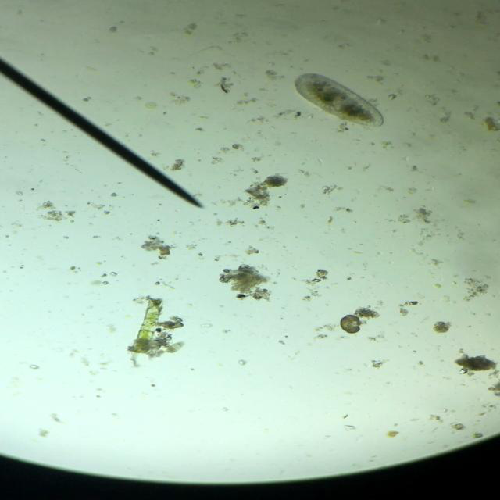

This image above most likely belongs to Paramecium with 100.0 percent confidence.

1/1 [==============================] - 0s 75ms/step


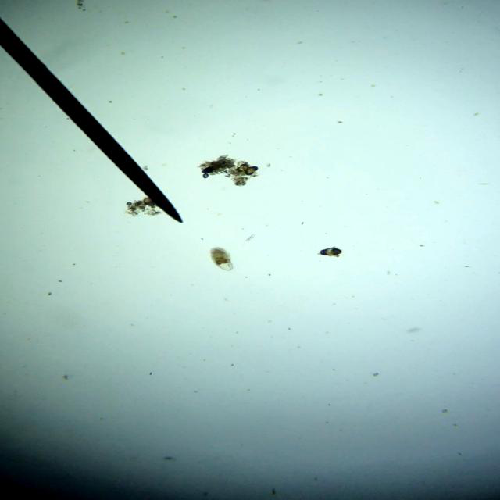

This image above most likely belongs to Protozoa with 99.9936 percent confidence.

1/1 [==============================] - 0s 69ms/step


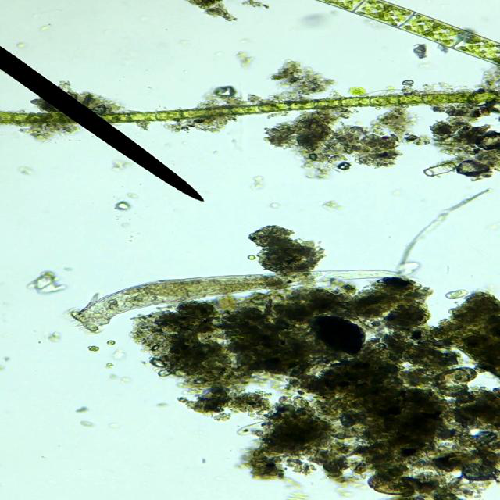

This image above most likely belongs to Rotifer with 100.0 percent confidence.

1/1 [==============================] - 0s 85ms/step


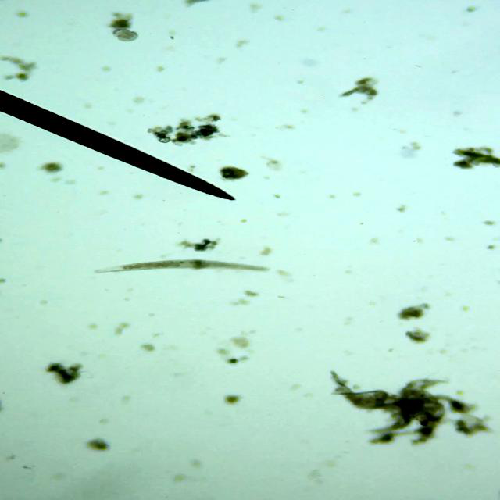

This image above most likely belongs to Spirostomum with 100.0 percent confidence.

1/1 [==============================] - 0s 73ms/step


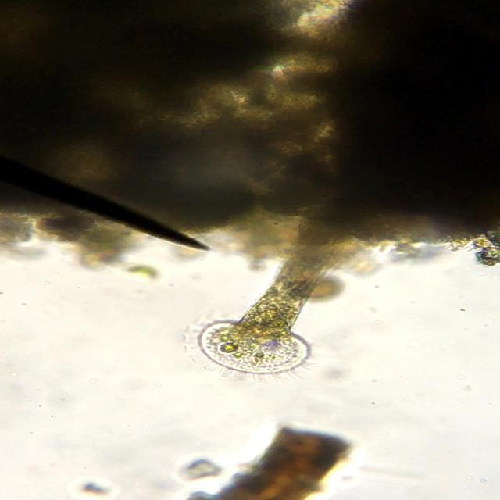

This image above most likely belongs to Stentor with 100.0 percent confidence.

1/1 [==============================] - 0s 82ms/step


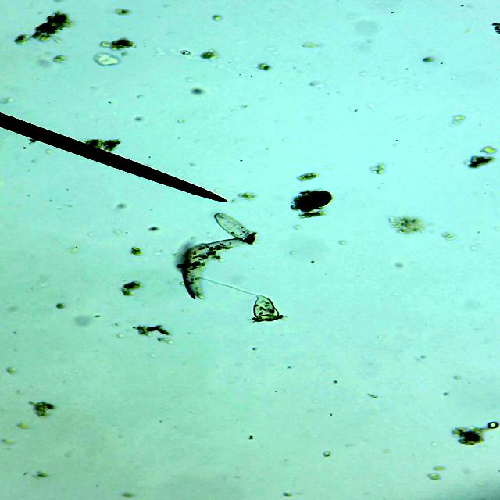

This image above most likely belongs to Vorticella with 100.0 percent confidence.

1/1 [==============================] - 0s 95ms/step


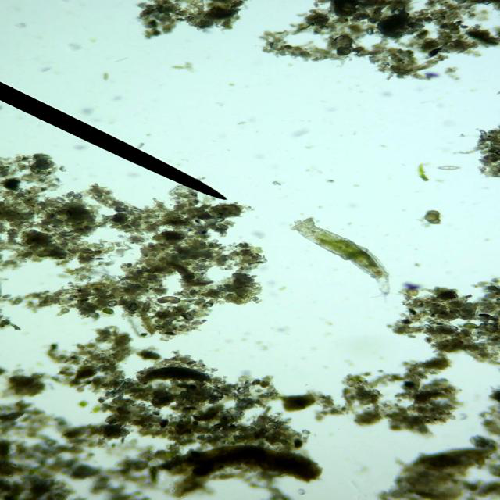

This image above most likely belongs to Rotifer with 100.0 percent confidence.



In [37]:
# multi_image_paths

for one_image_path in multi_image_paths:
    
    # getting image by loading it using image path and the target size
    image = tf.keras.utils.load_img(one_image_path, 
                                  target_size=(image_height, image_width))
    
    # creating array from the images
    image_array = tf.keras.utils.img_to_array(image)
    
    # print(image_array)
    
    # inserting an another dimension in input
    image_array_dim = tf.expand_dims(image_array, 0) # create the batch with 0
    
    #print(image_array_dim)
    
    # prediction 
    predict = protozoa_cnn_model.predict(image_array_dim)

    # printing the image and the predictions below 
    
    score = tf.nn.softmax(predict[0])
    
    # print(cap_test_protozoa_labels) # ['Spirostomum', 'Paramecium', 'Protozoa', 'Rotifer', 'Stentor', 'Vorticella']
    
    max_score_index = np.argmax(score, axis=0)
    
    max_score_percentage =  100 * np.max(score, axis=0)

    display(image) # display image
    print((f'This image above most likely belongs to {cap_test_protozoa_labels[max_score_index]}' 
                f' with {round(max_score_percentage, 4)} percent confidence.'))
    print()

# Plotting the Classification Metrics 
* Loss and Accuracy
* Confusion Matrices
* Classification Reports

# Evaluate based on Test Data

In [38]:
loss, acc = protozoa_cnn_model.evaluate(test_data)
print(f'Loss: {round(loss, 6)}\nAccuracy: {acc}')

7/7 [==============================] - 3s 395ms/step - loss: 4.4300e-04 - accuracy: 1.0000
Loss: 0.000443
Accuracy: 1.0


The loss is low, and the accuracy is high, which means the image classification model based on the test data is highly accurate.

#### Predict on Test dataset

In [39]:
y_pred = protozoa_cnn_model.predict(test_data)

7/7 [==============================] - 3s 400ms/step


In [40]:
y_pred = np.argmax(y_pred, axis=1)

In [41]:
# print(y_pred)

#### True Labels of the Test dataset
https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset

In [42]:
y_test = np.concatenate([y for x, y in test_data], axis=0)

#### Sorting y_test and y_pred form least to greatest
Before, they were not sorted, and that caused problems for the matrix and report being incorrect.

In [43]:
sorted_y_test = sorted(y_test) # sorted y_test 0 to 5
sorted_y_pred = sorted(y_pred) # sorted y_pred 0 to 5

# print(sorted_y_test)
# print(sorted_y_pred)

#### Confusion Matrix

In [44]:
# confusion matrix
cm = confusion_matrix(sorted_y_test, sorted_y_pred)

# labels: cap_test_protozoa_labels
# ['Spirostomum', 'Paramecium', 'Protozoa', 'Rotifer', 'Stentor', 'Vorticella']

pd.DataFrame(cm, index=cap_test_protozoa_labels, columns=cap_test_protozoa_labels)

Spirostomum  Paramecium  Protozoa  Rotifer  Stentor  Vorticella
Spirostomum           31           0         0        0        0           0
Paramecium             0           4         0        0        0           0
Protozoa               0           0         2        0        0           0
Rotifer                0           0         0       86        0           0
Stentor                0           0         0        0       21           0
Vorticella             0           0         0        0        0          57

In the confusion matrix, we see that no errors occur in the data. Each microorganism label is correctly identified based on the predicted values (y-axis) and the actual values (x-axis). For example, the protozoa label Spirostomum is correctly predicted 31 times as the actual value Spirostomum.

#### Classification Report

In [45]:
print(classification_report(sorted_y_test, sorted_y_pred, 
                            target_names=cap_test_protozoa_labels))

              precision    recall  f1-score   support

 Spirostomum       1.00      1.00      1.00        31
  Paramecium       1.00      1.00      1.00         4
    Protozoa       1.00      1.00      1.00         2
     Rotifer       1.00      1.00      1.00        86
     Stentor       1.00      1.00      1.00        21
  Vorticella       1.00      1.00      1.00        57

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



The classification report shows that the data used is highly accurate at 100%. The precision and recall are all high, which indicates that predictions are correctly identified.